In [3]:
# Data Preparation

## Downlod The Dataset

In [2]:
! KAGGLE_CONFIG_DIR=. kaggle datasets download aayushme/leaves23

100%|█████████████████████████████████████████| 204M/204M [25:52<00:00, 133kB/s]
100%|█████████████████████████████████████████| 204M/204M [25:52<00:00, 138kB/s]


In [4]:
! unzip leaves23.zip

5.jpg  
  inflating: train/ulmus_rubra/13002228283208.jpg  
  inflating: train/ulmus_rubra/13002228283530.jpg  
  inflating: train/ulmus_rubra/13002228283598.jpg  
  inflating: train/ulmus_rubra/13002228283660.jpg  
  inflating: train/ulmus_rubra/13002228283746.jpg  
  inflating: train/ulmus_rubra/13002228283889.jpg  
  inflating: train/ulmus_rubra/13002228284176.jpg  
  inflating: train/ulmus_rubra/13002228284435.jpg  
  inflating: train/ulmus_rubra/13002228284484.jpg  
  inflating: train/ulmus_rubra/13002228285070.jpg  
  inflating: train/ulmus_rubra/13002228285126.jpg  
  inflating: train/ulmus_rubra/13002228286176.jpg  
  inflating: train/ulmus_rubra/13002228286358.jpg  
  inflating: train/ulmus_rubra/13002228286681.jpg  
  inflating: train/ulmus_rubra/13002228286924.jpg  
  inflating: train/ulmus_rubra/13002228287890.jpg  
  inflating: train/ulmus_rubra/13002228288002.jpg  
  inflating: train/ulmus_rubra/13002228288030.jpg  
  inflating: train/ulmus_rubra/13002228288205.jpg  
  in

## Generating Bounding Box

In [5]:
import cv2

def generate_object_boundingbox(img):
    '''
    generate object bounding box using Canny
    :params img: image containing the object
    :return list: (x_left, y_top, x_right, y_bottom)
    '''
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_gray = cv2.blur(img_gray, (3,3))
    img_canny =  cv2.Canny(img_gray, 100, 100*2)

    _, contours, _ = cv2.findContours(img_canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # generate bounding boxes
    bounding_boxes = []
    for contour in contours:
        polygon = cv2.approxPolyDP(contour, 3, True)
        bounding_boxes.append(cv2.boundingRect(polygon))
    
    # find the outer bounding box
    x_r, y_b = 0, 0
    x_l, y_t, _ = img.shape
    for box in bounding_boxes:
        if box[0] < x_l:
            x_l = box[0]
        if box[1] < y_t:
            y_t = box[1]
        if box[0] + box[2] > x_r:
            x_r = box[0] + box[2]
        if box[1] + box[3] > y_b:
            y_b = box[1] + box[3]
    return x_l, y_t, x_r, y_b



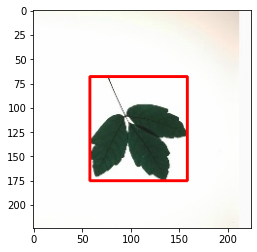

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('leaves/test/acer_griseum/ny1011-05-4.jpg')
x_l, y_t, x_r, y_b = generate_object_boundingbox(img)

# draw the rect
image_copy = np.copy(img)

cv2.rectangle(image_copy, (x_l, y_t), (x_r, y_b), [255,0,0], 2)

_ = plt.imshow(image_copy)